In [1]:
import re
import json
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
import networkx as nx
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
movie_data = namedtuple('movie', 'scenes, occurrences')

In [3]:
word_tokenizer = RegexpTokenizer(r'(\w+[-|\']?\w*)')

In [4]:
def script_to_secnens_dict(file_name):
    script = open(file_name,"r").read().decode("utf-8")
    scenes = defaultdict(str)
    matches = regex.finditer(script)
    for match in matches:
        sceneId = match.group(1)
        dialog = match.group(2)
        scenes[sceneId] += dialog
    return scenes

In [5]:
def process_script(script, tokenizer, name_mappings, special_cases=[], ignore=[]):
    occurrences = defaultdict(set)
    scenes = script.split("_START OF NEW SCENE_")[1:]
    
    for index, scene in enumerate(scenes):
        text = scene.lower()
        tokens = tokenizer.tokenize(text)

        for key, name in special_cases.iteritems():
            if key in scene:
                occurrences[index].add(special_cases[key])

        for token in tokens:
            if token in ignore:
                continue
            elif name_mappings.has_key(token):
                occurrences[index].add(name_mappings[token][0])
    
    return movie_data(scenes=scenes, occurrences=occurrences)

In [6]:
def generate_movie_network(occurrences):
    network = nx.Graph()
    for scene, characters in occurrences.iteritems():
        for character in characters:
            network.add_node(character)
            for other in characters:
                if character != other:
                    network.add_edge(character, other)
    return network

In [7]:
def display_network(G):
    subgraphs = list(nx.connected_component_subgraphs(G))
    for subgraph in subgraphs:
        plt.figure(figsize=(20,20))
        plt.axis("off")
        nx.draw_networkx(subgraph, with_labels=True, edge_color="#cccccc", node_size=[150 + G.degree(n)**2 for n in G.nodes])
        

In [8]:
#[2 + G.degree(n) for n in G.nodes]

In [9]:
def debug_characters_in_scenes(movie, sceneId):
    print movie.occurrences[sceneId], movie.scenes[sceneId]

In [10]:
def debug_scenes_by_character(movie, name):
    for scene, character in movie.occurrences.iteritems():
        if  name in character:
            print movie.scenes[scene]

In [11]:
def save_as_json(data, file_name):
    with open("../movieScripts/processed/" + file_name + ".json", 'w') as f:
        f.write(json.dumps(data))

In [12]:
files = [
    #"(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt",
    #"(3)_Harry_Potter_and_the_Prisoner_of_Azkaban.txt",
    "(4)_Harry_Potter_and_the_Goblet_of_Fire.txt"
]

In [13]:
with open('nameDict.json') as json_file:  
    name_dict = json.load(json_file, encoding="utf-8")

In [14]:
ignore_in_movie={
    "(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt":["fluffy", "tufty", "gryffindor"],
    "(3)_Harry_Potter_and_the_Prisoner_of_Azkaban.txt":["miranda", "ernie", "horace"]
}

In [15]:
special_cases = {
    "WOOD":"oliver wood", 
    "oliver wood": u"oliver wood", 
    "mrs. weasley": u"molly weasley", 
    "mr. weasley": u"arthur weasley",
    "arthur weasley's daughter": u"ginny weasley",
    "ERNIE PRANG": u"ernie prang",
    "wailing widow": u"wailing widow",
    "Miss Brown": u"lavender brown",
    "MRS BLACK": u"walburga black",
    "BARTY JR": u"barty crouch jr.",
    "BARTY SR": u"barty crouch",
    "Frank Longbottom": u"frank longbottom"
}

In [16]:
movies = []

In [17]:
for script_name in files:
    with open("../movieScripts/" + script_name) as f:
        script = f.read()
        ignore = []
        if ignore_in_movie.has_key(script_name):
            ignore = ignore_in_movie[script_name]
            print ignore
        
        data = process_script(
            script=script, 
            tokenizer=word_tokenizer, 
            name_mappings=name_dict, 
            special_cases=special_cases, 
            ignore=ignore
        )
        movies.append(data)

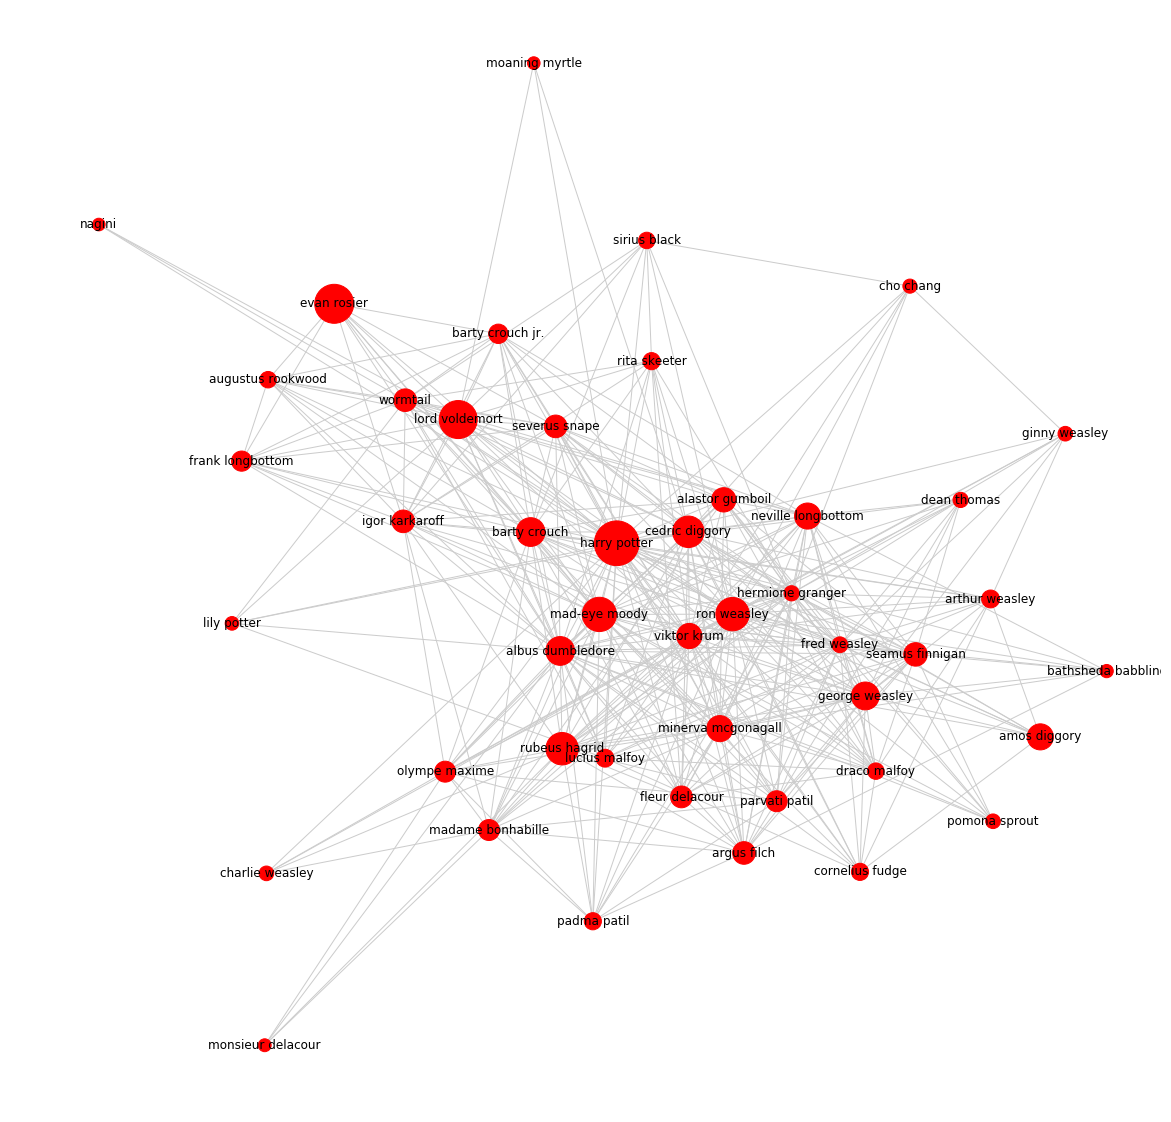

In [18]:
for movie in movies:
    G = generate_movie_network(movie.occurrences) 
    display_network(G)

In [19]:
debug_scenes_by_character(movies[0], "cho chang")



INT. TRAIN CARRIAGE
calls

Harry, Ron and Hermione are seated on a train. A voice
out.
LADY OFFSCREEN
Anything from the trolley? Anything
from the trolley?
The lady appears at their door.
LADY
Anything from the trolley dears?
RON
Packet of drewbals and a liquorice wand.
Ron sees he hasn't enough money.
RON
On second thought, just the drewbals.
HARRY
It's alright I'll get it.
RON
Just the drewbals, thanks.
Cho Chan walks up to the trolley.
CHO
Two pumpkin pasties please.
Harry and Cho look at each other and smile.
Thank you.

CHO

LADY
Anything sweet for you dear?
HARRY
Oh no thank you I'm not hungry.
HERMIONE
This is horrible, how can the ministry
not know who conjured it. Isn't there
any security or?
RON
Loads according to Dad, that's what
worried them so much. Happened right
under their noses.
Hermione sees Harry rubbing his head.
HERMIONE

It's hurting again isn't it, your scar.

I'm fine.

HARRY

HERMIONE
You know Sirius will want to hear about
this. What you saw at the world c